importing the librarires

In [1]:
import numpy as np
import pandas as pd
from numba import njit
import vectorbtpro as vbt
# import pandas_ta as ta
import talib as talib
from typing import List

In [2]:
m1_data = vbt.HDFData.fetch("GU_OHLCV_3Y.h5")

#M15 DataFrame
m15_ohlcv = m1_data.get().resample("15T").agg({  
    "Open": "first",
    "High": "max",
    "Low": "min",
    "Close": "last",
    "Volume": "sum"
})

#M30 DataFrame
m30_ohlcv = m1_data.get().resample("30T").agg({  
    "Open": "first",
    "High": "max",
    "Low": "min",
    "Close": "last",
    "Volume": "sum"
})

#H1 DataFrame
h1_ohlcv = m1_data.get().resample("1h").agg({  
    "Open": "first",
    "High": "max",
    "Low": "min",
    "Close": "last",
    "Volume": "sum"
})

#4h DataFrame
h4_ohlcv = m1_data.get().resample("4h").agg({  
    "Open": "first",
    "High": "max",
    "Low": "min",
    "Close": "last",
    "Volume": "sum"
})

In [3]:
m1_data.wrapper.index #pandas doesnt recognise the frequency because of missing timestamps

DatetimeIndex(['2019-08-27 00:00:00+00:00', '2019-08-27 00:01:00+00:00',
               '2019-08-27 00:02:00+00:00', '2019-08-27 00:03:00+00:00',
               '2019-08-27 00:04:00+00:00', '2019-08-27 00:05:00+00:00',
               '2019-08-27 00:06:00+00:00', '2019-08-27 00:07:00+00:00',
               '2019-08-27 00:08:00+00:00', '2019-08-27 00:09:00+00:00',
               ...
               '2022-08-26 16:50:00+00:00', '2022-08-26 16:51:00+00:00',
               '2022-08-26 16:52:00+00:00', '2022-08-26 16:53:00+00:00',
               '2022-08-26 16:54:00+00:00', '2022-08-26 16:55:00+00:00',
               '2022-08-26 16:56:00+00:00', '2022-08-26 16:57:00+00:00',
               '2022-08-26 16:58:00+00:00', '2022-08-26 16:59:00+00:00'],
              dtype='datetime64[ns, UTC]', name='time', length=1122468, freq=None)

In [4]:
m1_resampler = m1_data.wrapper.create_resampler("1m")

In [5]:
m1_resampler.index_difference(reverse=True)

DatetimeIndex(['2019-08-29 17:40:00+00:00', '2019-08-30 17:00:00+00:00',
               '2019-08-30 17:01:00+00:00', '2019-08-30 17:02:00+00:00',
               '2019-08-30 17:03:00+00:00', '2019-08-30 17:04:00+00:00',
               '2019-08-30 17:05:00+00:00', '2019-08-30 17:06:00+00:00',
               '2019-08-30 17:07:00+00:00', '2019-08-30 17:08:00+00:00',
               ...
               '2022-08-21 17:20:00+00:00', '2022-08-21 17:21:00+00:00',
               '2022-08-22 17:03:00+00:00', '2022-08-24 17:01:00+00:00',
               '2022-08-24 17:04:00+00:00', '2022-08-24 17:26:00+00:00',
               '2022-08-25 18:04:00+00:00', '2022-08-25 18:19:00+00:00',
               '2022-08-25 18:20:00+00:00', '2022-08-25 18:23:00+00:00'],
              dtype='datetime64[ns, UTC]', name='time', length=455352, freq=None)

Downsampling `1 minute` data to Higher Time Frames

In [6]:
m15_data = m1_data.resample('15T') #1 minute to 15 mins
m30_data = m1_data.resample('30T') #1 minute to 30 mins
h1_data = m1_data.resample("1h") #1 minute to 1hour
h4_data = m1_data.resample("4h") #1 minute to  4 hour
d1_data = m1_data.resample("1d") #1 minute to daily

The missing frequency has been checked for , ` freq = '4H'` and `freq = 'D' `  

In [20]:
# m15_data.wrapper.index , m30_data.wrapper.index , 
h1_data.wrapper.index, h4_data.wrapper.index,d1_data.wrapper.index #pandas now recognises the frequency of the timeseries after resampling

(DatetimeIndex(['2019-08-27 00:00:00+00:00', '2019-08-27 01:00:00+00:00',
                '2019-08-27 02:00:00+00:00', '2019-08-27 03:00:00+00:00',
                '2019-08-27 04:00:00+00:00', '2019-08-27 05:00:00+00:00',
                '2019-08-27 06:00:00+00:00', '2019-08-27 07:00:00+00:00',
                '2019-08-27 08:00:00+00:00', '2019-08-27 09:00:00+00:00',
                ...
                '2022-08-26 07:00:00+00:00', '2022-08-26 08:00:00+00:00',
                '2022-08-26 09:00:00+00:00', '2022-08-26 10:00:00+00:00',
                '2022-08-26 11:00:00+00:00', '2022-08-26 12:00:00+00:00',
                '2022-08-26 13:00:00+00:00', '2022-08-26 14:00:00+00:00',
                '2022-08-26 15:00:00+00:00', '2022-08-26 16:00:00+00:00'],
               dtype='datetime64[ns, UTC]', name='time', length=26297, freq='H'),
 DatetimeIndex(['2019-08-27 00:00:00+00:00', '2019-08-27 04:00:00+00:00',
                '2019-08-27 08:00:00+00:00', '2019-08-27 12:00:00+00:00',
         

One can use the <code> .get() </code> from `vectorBT's` to convert `vectorbtpro.data.custom.HDFData` to `pd.DataFrame`

#### Alignment

In [8]:
#obtaining all the closing using the .get() method
m15_close = m15_data.get()['Close']
m30_close = m30_data.get()['Close']
h1_close = h1_data.get()['Close']
h4_close = h4_data.get()['Close']
d1_close = d1_data.get()['Close']

In [9]:
h1_close.tail()

time
2022-08-26 12:00:00+00:00    1.175535
2022-08-26 13:00:00+00:00    1.175515
2022-08-26 14:00:00+00:00    1.174390
2022-08-26 15:00:00+00:00    1.173765
2022-08-26 16:00:00+00:00    1.174355
Freq: H, Name: Close, dtype: float64

In [10]:
h1_close.iloc[:4] ,h4_close.iloc[:4] 

(time
 2019-08-27 00:00:00+00:00    1.221735
 2019-08-27 01:00:00+00:00    1.221890
 2019-08-27 02:00:00+00:00    1.221580
 2019-08-27 03:00:00+00:00    1.225030
 Freq: H, Name: Close, dtype: float64,
 time
 2019-08-27 00:00:00+00:00    1.225030
 2019-08-27 04:00:00+00:00    1.226965
 2019-08-27 08:00:00+00:00    1.228735
 2019-08-27 12:00:00+00:00    1.228765
 Freq: 4H, Name: Close, dtype: float64)

In [11]:
h1_h4_ratio = h1_close / h4_close
h1_h4_ratio.iloc[:4]

time
2019-08-27 00:00:00+00:00    0.99731
2019-08-27 01:00:00+00:00        NaN
2019-08-27 02:00:00+00:00        NaN
2019-08-27 03:00:00+00:00        NaN
Name: Close, dtype: float64

In [12]:
h1_h4_ratio.shift(-1).iloc[:9]

time
2019-08-27 00:00:00+00:00         NaN
2019-08-27 01:00:00+00:00         NaN
2019-08-27 02:00:00+00:00         NaN
2019-08-27 03:00:00+00:00    0.998798
2019-08-27 04:00:00+00:00         NaN
2019-08-27 05:00:00+00:00         NaN
2019-08-27 06:00:00+00:00         NaN
2019-08-27 07:00:00+00:00    0.999202
2019-08-27 08:00:00+00:00         NaN
Name: Close, dtype: float64

Upsampling

* Don't forward and backward shift when downsampling, only when upsampling.



In [13]:
h4_h1_close = h4_close.shift(1).resample("1h").last().shift(-1).ffill()
h4_h1_close.iloc[:8]

time
2019-08-27 00:00:00+00:00         NaN
2019-08-27 01:00:00+00:00         NaN
2019-08-27 02:00:00+00:00         NaN
2019-08-27 03:00:00+00:00    1.225030
2019-08-27 04:00:00+00:00    1.225030
2019-08-27 05:00:00+00:00    1.225030
2019-08-27 06:00:00+00:00    1.225030
2019-08-27 07:00:00+00:00    1.226965
Freq: H, Name: Close, dtype: float64

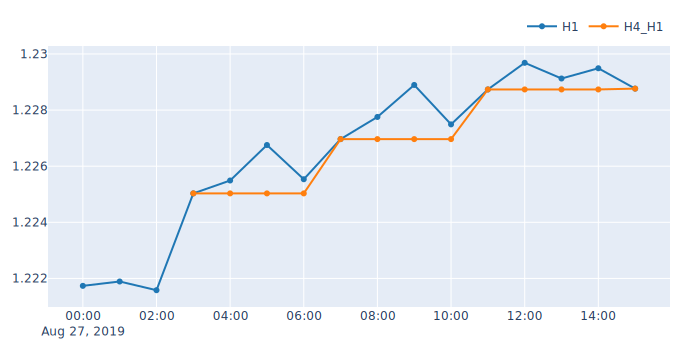

In [14]:
fig = h1_close.rename("H1").iloc[:16].vbt.plot()
h4_h1_close.rename("H4_H1").iloc[:16].vbt.plot(fig=fig).show_svg()

## VBT

Seems like a lot of work is required to do everything right? But don't worry, vectorbt has got your back! To resample an array safely, we can use GenericAccessor.resample_closing for information available only at the end of each bar, and GenericAccessor.resample_opening for information available already at the beginning of each bar:

In [15]:
h4_close.vbt.resample_closing("1h")

time
2019-08-27 00:00:00+00:00         NaN
2019-08-27 01:00:00+00:00         NaN
2019-08-27 02:00:00+00:00         NaN
2019-08-27 03:00:00+00:00    1.225030
2019-08-27 04:00:00+00:00    1.225030
                               ...   
2022-08-26 12:00:00+00:00    1.177480
2022-08-26 13:00:00+00:00    1.177480
2022-08-26 14:00:00+00:00    1.177480
2022-08-26 15:00:00+00:00    1.173765
2022-08-26 16:00:00+00:00    1.173765
Freq: H, Name: Close, Length: 26297, dtype: float64

In [16]:
h4_open  = h4_data.get("Open")
h4_open.vbt.resample_opening("1h")

time
2019-08-27 00:00:00+00:00    1.221095
2019-08-27 01:00:00+00:00    1.221095
2019-08-27 02:00:00+00:00    1.221095
2019-08-27 03:00:00+00:00    1.221095
2019-08-27 04:00:00+00:00    1.225045
                               ...   
2022-08-26 12:00:00+00:00    1.177490
2022-08-26 13:00:00+00:00    1.177490
2022-08-26 14:00:00+00:00    1.177490
2022-08-26 15:00:00+00:00    1.177490
2022-08-26 16:00:00+00:00    1.173765
Freq: H, Name: Open, Length: 26297, dtype: float64

Note: Use `resample_opening` only if information in the array happens exactly at the beginning of the bar (such as open price), and `resample_closing` if information happens after that (such as high, low, and close price).

In [17]:
h4_close

time
2019-08-27 00:00:00+00:00    1.225030
2019-08-27 04:00:00+00:00    1.226965
2019-08-27 08:00:00+00:00    1.228735
2019-08-27 12:00:00+00:00    1.228765
2019-08-27 16:00:00+00:00    1.228070
                               ...   
2022-08-26 00:00:00+00:00    1.178830
2022-08-26 04:00:00+00:00    1.182145
2022-08-26 08:00:00+00:00    1.177480
2022-08-26 12:00:00+00:00    1.173765
2022-08-26 16:00:00+00:00    1.174355
Freq: 4H, Name: Close, Length: 6575, dtype: float64

We can also use `Resampler.from_pd_date_range` to build our custom hourly index starting from a custom start time and ending at custom end time

In [19]:
resampler = vbt.Resampler.from_pd_date_range(
source_index=h4_close.index,
source_freq="4h",
start="2022-01-01 10:00:00",
end="2022-08-26 22:00:00",
freq="1h",
)

h4_close.vbt.resample_closing(resampler)

2022-01-01 10:00:00    1.352055
2022-01-01 11:00:00    1.352055
2022-01-01 12:00:00    1.352055
2022-01-01 13:00:00    1.352055
2022-01-01 14:00:00    1.352055
                         ...   
2022-08-26 18:00:00    1.173765
2022-08-26 19:00:00    1.174355
2022-08-26 20:00:00    1.174355
2022-08-26 21:00:00    1.174355
2022-08-26 22:00:00    1.174355
Freq: H, Name: Close, Length: 5701, dtype: float64

### Adding Indicators

In [26]:
## VBT has all the talib indicators built in
print(vbt.IF.get_talib_indicators() )

{'HT_DCPERIOD', 'DIV', 'CDLCONCEALBABYSWALL', 'SINH', 'WILLR', 'CDLTRISTAR', 'CDLHAMMER', 'CDLLONGLEGGEDDOJI', 'MFI', 'SMA', 'PPO', 'CDLIDENTICAL3CROWS', 'PLUS_DI', 'BBANDS', 'WCLPRICE', 'BOP', 'LINEARREG_INTERCEPT', 'CDLSHORTLINE', 'ATR', 'CCI', 'AD', 'STDDEV', 'CDLINVERTEDHAMMER', 'CDL3INSIDE', 'CDL2CROWS', 'MAXINDEX', 'KAMA', 'HT_DCPHASE', 'LINEARREG_SLOPE', 'CDLSTALLEDPATTERN', 'CDL3OUTSIDE', 'MIDPRICE', 'SUB', 'LINEARREG', 'SQRT', 'CORREL', 'CDLABANDONEDBABY', 'STOCH', 'COS', 'BETA', 'CDLMATCHINGLOW', 'DX', 'ADOSC', 'CDLTASUKIGAP', 'CDL3LINESTRIKE', 'CDLHANGINGMAN', 'MININDEX', 'MINUS_DI', 'TANH', 'ROCR100', 'CDLHOMINGPIGEON', 'CDLSEPARATINGLINES', 'RSI', 'SAREXT', 'LN', 'ROCP', 'CDLINNECK', 'OBV', 'TAN', 'HT_TRENDMODE', 'CDLDOJI', 'HT_TRENDLINE', 'CDLENGULFING', 'CDLHIKKAKEMOD', 'CEIL', 'LINEARREG_ANGLE', 'EXP', 'AROON', 'CDLGRAVESTONEDOJI', 'CDLRICKSHAWMAN', 'CDLTHRUSTING', 'CDLONNECK', 'CDLCOUNTERATTACK', 'CDLKICKINGBYLENGTH', 'CDLKICKING', 'MA', 'CDLADVANCEBLOCK', 'CDLLONGLINE

In [22]:
vbt.talib('RSI')

vectorbtpro.indicators.factory.talib.RSI

In [23]:
vbt.talib('BBANDS')

vectorbtpro.indicators.factory.talib.BBANDS

In [28]:
h4_sma = vbt.talib("SMA").run(h4_data.get("Close"), skipna=True).real
h4_sma

time
2019-08-27 00:00:00+00:00         NaN
2019-08-27 04:00:00+00:00         NaN
2019-08-27 08:00:00+00:00         NaN
2019-08-27 12:00:00+00:00         NaN
2019-08-27 16:00:00+00:00         NaN
                               ...   
2022-08-26 00:00:00+00:00    1.180568
2022-08-26 04:00:00+00:00    1.180602
2022-08-26 08:00:00+00:00    1.180419
2022-08-26 12:00:00+00:00    1.180122
2022-08-26 16:00:00+00:00    1.179874
Freq: 4H, Name: Close, Length: 6575, dtype: float64

In [55]:
m15_rsi = vbt.talib("RSI", timeperiod = 21).run(m15_data.get("Close"), skipna=True).real
m15_rsi[15:35]

time
2019-08-27 03:45:00+00:00          NaN
2019-08-27 04:00:00+00:00          NaN
2019-08-27 04:15:00+00:00          NaN
2019-08-27 04:30:00+00:00          NaN
2019-08-27 04:45:00+00:00          NaN
2019-08-27 05:00:00+00:00          NaN
2019-08-27 05:15:00+00:00    66.794995
2019-08-27 05:30:00+00:00    68.085106
2019-08-27 05:45:00+00:00    72.800915
2019-08-27 06:00:00+00:00    70.051812
2019-08-27 06:15:00+00:00    70.352527
2019-08-27 06:30:00+00:00    70.992007
2019-08-27 06:45:00+00:00    63.883656
2019-08-27 07:00:00+00:00    66.210081
2019-08-27 07:15:00+00:00    67.966770
2019-08-27 07:30:00+00:00    69.820159
2019-08-27 07:45:00+00:00    66.327923
2019-08-27 08:00:00+00:00    68.741302
2019-08-27 08:15:00+00:00    69.344878
2019-08-27 08:30:00+00:00    69.577889
Freq: 15T, Name: Close, dtype: float64

In [45]:
m15_ema = vbt.talib("EMA", timeperiod = 15 ).run(m15_data.get("Close"), skipna=True).real
m15_ema

time
2019-08-27 00:00:00+00:00         NaN
2019-08-27 00:15:00+00:00         NaN
2019-08-27 00:30:00+00:00         NaN
2019-08-27 00:45:00+00:00         NaN
2019-08-27 01:00:00+00:00         NaN
                               ...   
2022-08-26 15:45:00+00:00    1.175336
2022-08-26 16:00:00+00:00    1.175108
2022-08-26 16:15:00+00:00    1.174983
2022-08-26 16:30:00+00:00    1.174850
2022-08-26 16:45:00+00:00    1.174788
Freq: 15T, Name: Close, Length: 105188, dtype: float64

In [50]:
m15_bbands = vbt.talib("BBANDS").run(m15_data.get("Close"), skipna=True)
m15_bbands.lowerband

time
2019-08-27 00:00:00+00:00         NaN
2019-08-27 00:15:00+00:00         NaN
2019-08-27 00:30:00+00:00         NaN
2019-08-27 00:45:00+00:00         NaN
2019-08-27 01:00:00+00:00    1.221149
                               ...   
2022-08-26 15:45:00+00:00    1.173478
2022-08-26 16:00:00+00:00    1.173250
2022-08-26 16:15:00+00:00    1.173355
2022-08-26 16:30:00+00:00    1.173395
2022-08-26 16:45:00+00:00    1.173354
Freq: 15T, Name: Close, Length: 105188, dtype: float64

In [51]:
m15_bbands.middleband

time
2019-08-27 00:00:00+00:00         NaN
2019-08-27 00:15:00+00:00         NaN
2019-08-27 00:30:00+00:00         NaN
2019-08-27 00:45:00+00:00         NaN
2019-08-27 01:00:00+00:00    1.221657
                               ...   
2022-08-26 15:45:00+00:00    1.174085
2022-08-26 16:00:00+00:00    1.173909
2022-08-26 16:15:00+00:00    1.173847
2022-08-26 16:30:00+00:00    1.173800
2022-08-26 16:45:00+00:00    1.173931
Freq: 15T, Name: Close, Length: 105188, dtype: float64

In [52]:
m15_bbands.upperband

time
2019-08-27 00:00:00+00:00         NaN
2019-08-27 00:15:00+00:00         NaN
2019-08-27 00:30:00+00:00         NaN
2019-08-27 00:45:00+00:00         NaN
2019-08-27 01:00:00+00:00    1.222165
                               ...   
2022-08-26 15:45:00+00:00    1.174692
2022-08-26 16:00:00+00:00    1.174568
2022-08-26 16:15:00+00:00    1.174339
2022-08-26 16:30:00+00:00    1.174205
2022-08-26 16:45:00+00:00    1.174508
Freq: 15T, Name: Close, Length: 105188, dtype: float64

In [56]:
m15_bbands_rsi = vbt.talib("BBANDS").run(m15_rsi, skipna=True)

In [57]:
m15_bbands_rsi.middleband

time
2019-08-27 00:00:00+00:00          NaN
2019-08-27 00:15:00+00:00          NaN
2019-08-27 00:30:00+00:00          NaN
2019-08-27 00:45:00+00:00          NaN
2019-08-27 01:00:00+00:00          NaN
                               ...    
2022-08-26 15:45:00+00:00    33.463077
2022-08-26 16:00:00+00:00    33.073149
2022-08-26 16:15:00+00:00    33.293702
2022-08-26 16:30:00+00:00    33.535274
2022-08-26 16:45:00+00:00    34.467586
Freq: 15T, Name: Close, Length: 105188, dtype: float64